# Diamond Price Dataset EDA

## Introduction to the data

**Goal :** Given some information about diamond, we need to predict it's price

There are 10 independant features in this dataset:

* `id` idenitifer for this diamon
* `carrat` unique of weight used to mesure gemstones
* `cut` quality of the diamon
* `clarity` the mesure of purity and rarity of the diamon
*  `depth` the depth is the height in mm
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[kaggle](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


**Note:** No missing values in this dataset

In [13]:
df.shape

(193573, 11)

In [17]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

**Note:** The id column is important for the dataset however, it will not reveal information that is important to the price of the diamond itself. Therefore we should remove the id column

In [18]:
df.drop("id", axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [21]:
df.duplicated().sum()

0

**Note:** There are no columns that are duplicated

In [22]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Since we only have strings or integer values in our columns, we can seperate our numerical and categorical features for more analysis

In [25]:
categorical_columns = df.columns[df.dtypes=="object"]
numerical_columns = df.columns[df.dtypes!="object"]
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [26]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [27]:
df.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [29]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [30]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

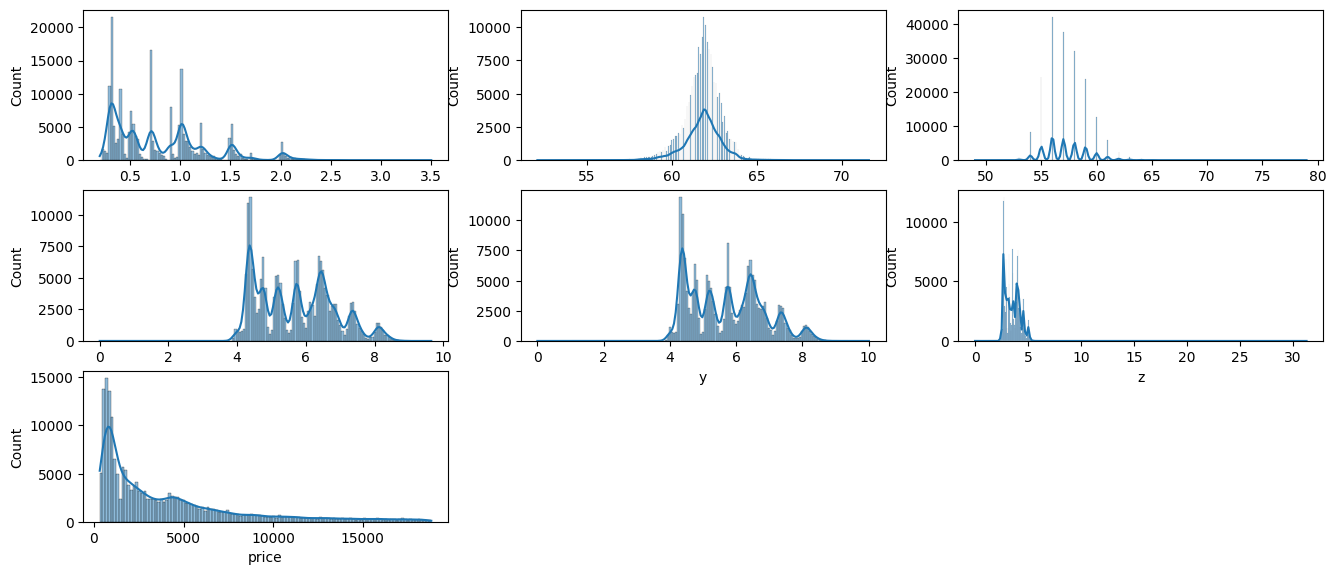

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

for index, column in enumerate(numerical_columns):
    plt.subplot(4, 3, index+1)
    sns.histplot(x=column, data=df, kde=True)

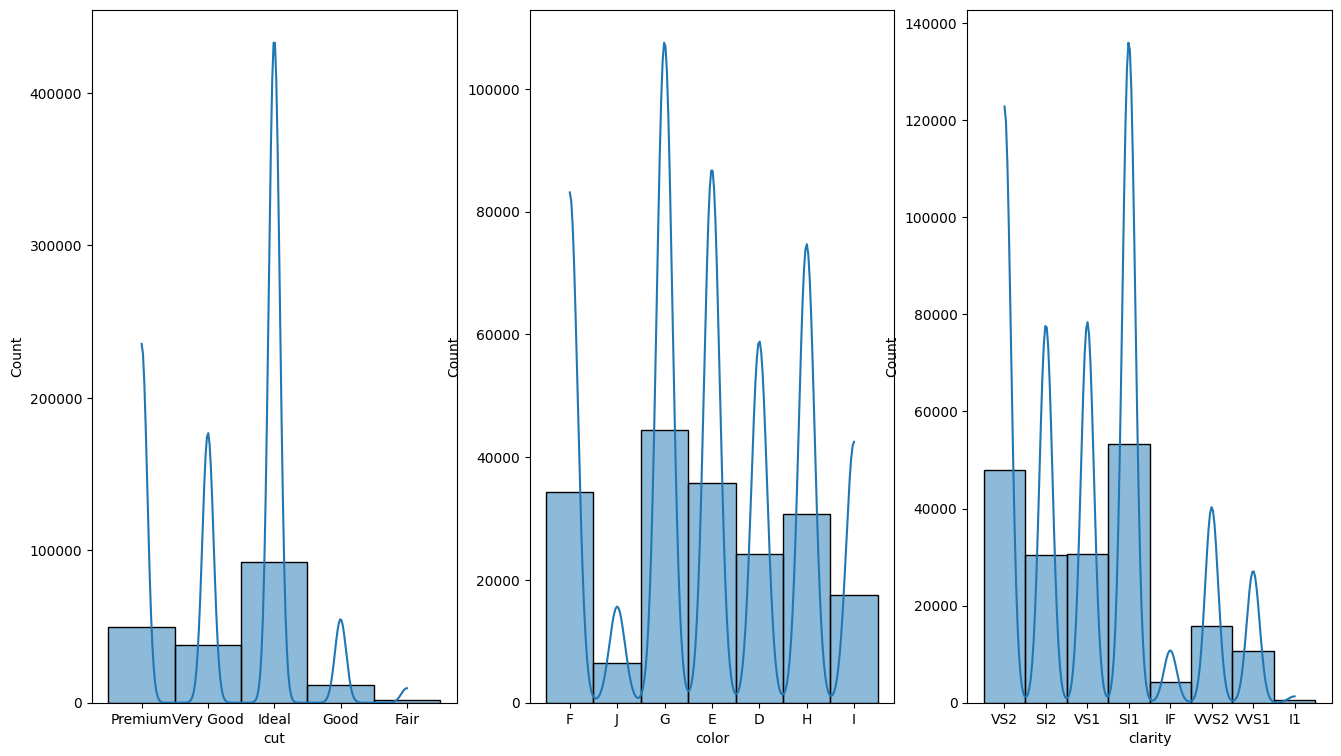

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
for index, column in enumerate(categorical_columns):
    plt.subplot(1, 3, index+1)
    sns.histplot(x=column, data=df, kde=True)

<Axes: >

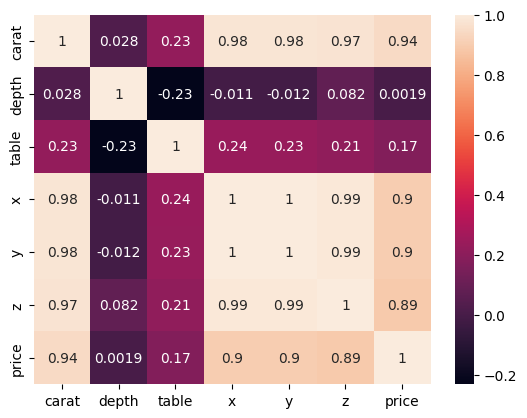

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Note:** It is clear that the feature x,y,z are HIGHLY corrolated with one another. There are also related to carat. Which mean that giving those values to the model it redudant. Those they will be removed from dataset in the pipelines

In [45]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

From simple domain knowledge, you can image that if it is Premium, in general the price will be higher than if it was Fair. Thus we can change these column such that "Premium" has the highest value and "Fair" the lowest. [Source](https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/)

Based on the link, the same applies to clarity, and color

In [47]:
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

In [48]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [49]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [50]:
df.cut = df.cut.map(cut_map)
df.clarity = df.clarity.map(clarity_map)
df.color = df.color.map(color_map)

In [51]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
